# 결정 트리(Decision Tree)
* 결정 트리 알고리즘을 사용해 분류 문제 해결하는 과정 학습

### 지난 시간에
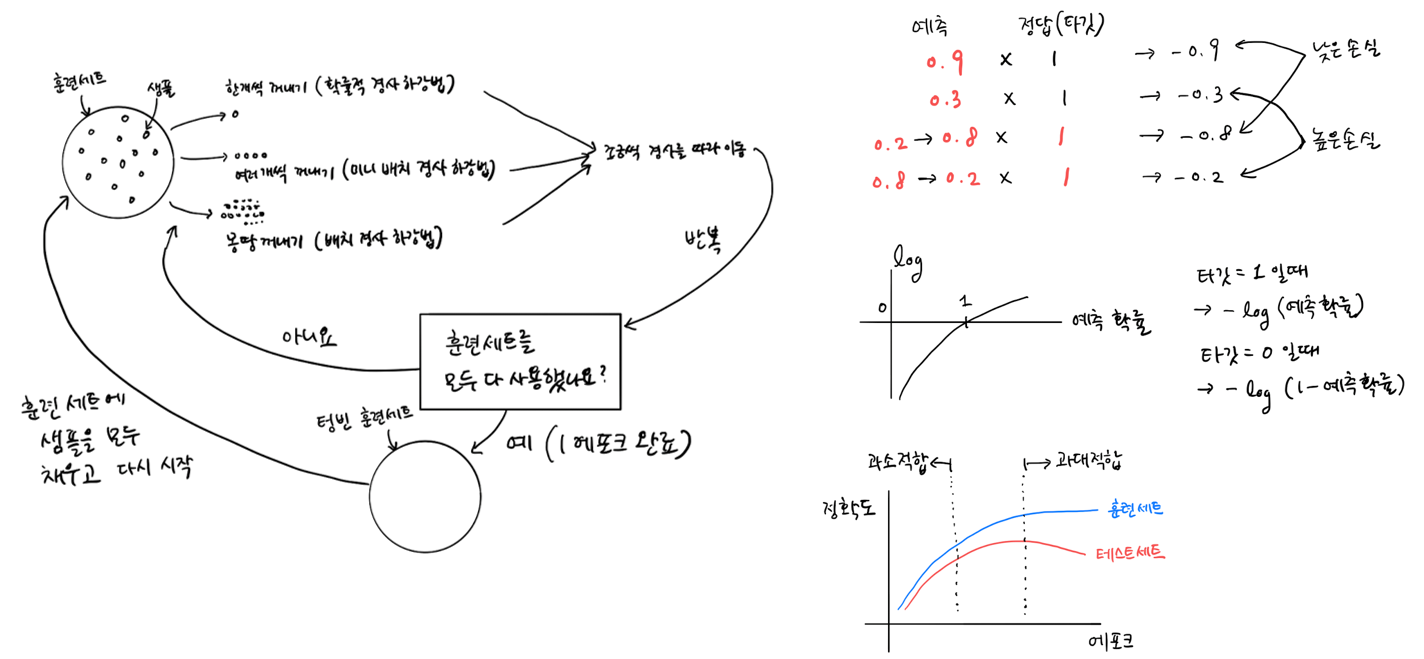

### 신상품으로 캔 와인 판매 준비

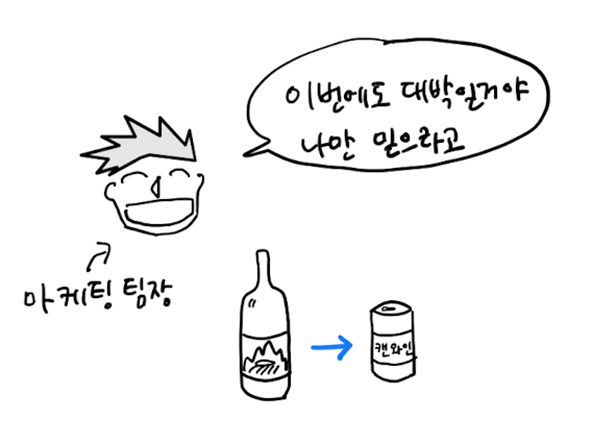


* 입고된 와인의 종류 표시 누락
  - **레드 와인, 화이트 와인**
* 캔에 표시된 정보
  - **알코올 도수, 당도, pH 값**

### 로지스틱 회귀로 와인 분류하기
* 6,497개의 와인 샘플 데이터 보유
* https://bit.ly/wine_csv_data 에서 csv 데이터 읽어와서 데이터프레임으로 저장

In [124]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

* 처음 5개 샘플 확인

In [126]:
wine.head()
# 처음 3개의 열 : 알코올 돗, 당도, ph값
# 마지막 1개의 열 : 타깃값 (0 - 레드 와인, 1- 화이트 와인)
# ==> 레드 와인과 화이트 와인을 구분하는 이진 분류 문제

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


* 데이터프레임 정보 확인

In [128]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


* 데이터프레임의 간단한 통계 확인

In [130]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


* 데이터프레임을 넘파이 배열로 변환

In [132]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

* 훈련 세트와 테스트 세트 분리

In [134]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =train_test_split(data, target, test_size=0.2, random_state=42)

In [135]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


* StandardScaler 클래스를 이용해 특성 표준화

In [137]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

* LogisticRegression 클래스를 이용해 로지스틱 회귀 모델 훈련

In [139]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

* 훈련 세트와 테스트 세트의 점수 확인

In [141]:
lr.score(train_scaled, train_target)

0.7808350971714451

In [142]:
lr.score(test_scaled, test_target)

0.7776923076923077

#### [설명하기 쉬운 모델과 어려운 모델]
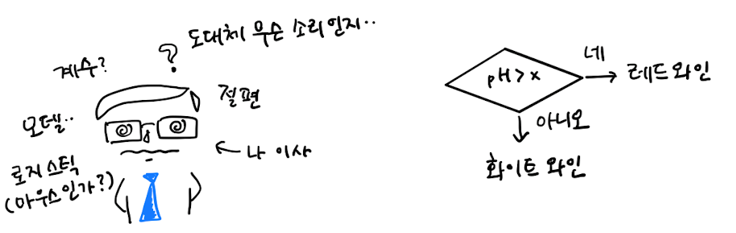

In [144]:
lr.coef_, lr.intercept_

(array([[ 0.51268071,  1.67335441, -0.68775646]]), array([1.81773456]))

* 이 모델이 왜 저런 계수 값을 학습했는지 정확히 이해하기 어렵고, 추측만 할 뿐...
* 대부분의 머신러닝 모델은 학습의 결과를 설명하기 어려움

### 결정 트리(Decision Tree)
* 머신러닝 알고리즘 중에서 **직관적으로 이해하기 쉬운** 것으로 다중 분류에 많이 사용* 데이터 안에서 if/else 기반으로 규칙을 찾아 학습하여 **트리 구조의 분류 규칙을 만듬**
* 결정 트리의 구조는 규칙 조건(if)을 나타내는 규칙 노드와 분류가 결정된 클래스 값이 표시된 리프 노드로 구성
* 사이킷런에서는 **DecisionTreeClassifier 클래스**를 결정 트리 모델 훈련에 사용
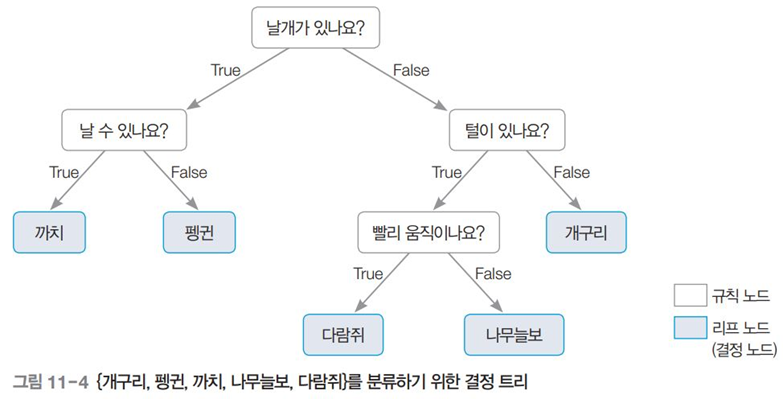


* DecisionTreeClassifier 클래스를 이용해 모델 훈련

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state =42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

* 모델 정확도 평가

In [150]:
dt.score(train_scaled, train_target)

0.996921300750433

In [151]:
dt.score(test_scaled, test_target)

0.8592307692307692

* 결정 트리 시각화 : **plot_tree() 함수** 사용

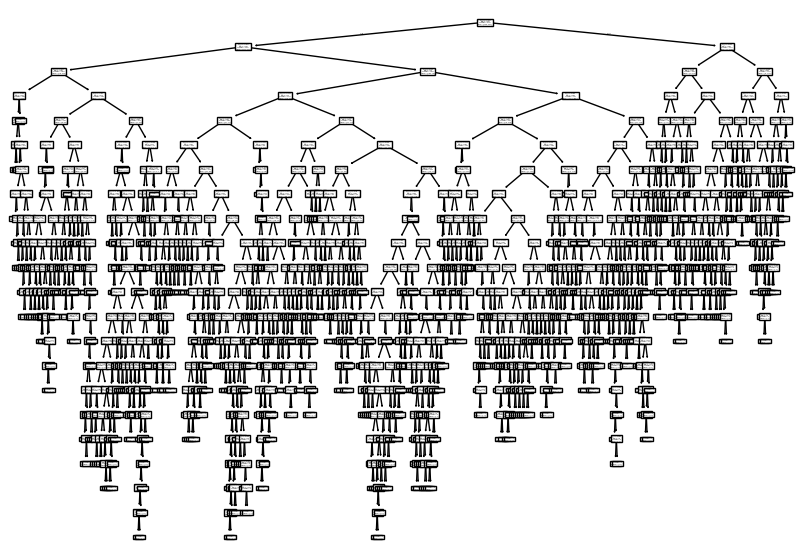

In [153]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

* plot_tree() 함수의 주요 매개변수
  - **max_depth** : 출력할 트리의 최대 깊이 (None이면 전체 트리 출력)
  - **feature_names** : 특성 이름 리스트
  - **class_names** : 클래스 이름 리스트 (분류 문제일 경우)
  - **label** : 노드 안에 표시할 항목. 'all' (기본값), 'root', 'none'
  - **filled** : 노드를 색칠할지 여부 (기본값 : False). True면 클래스별로 색상 구분
  - **rounded** : 노드 모서리를 둥글게 표시할지 여부 (기본값 : False)

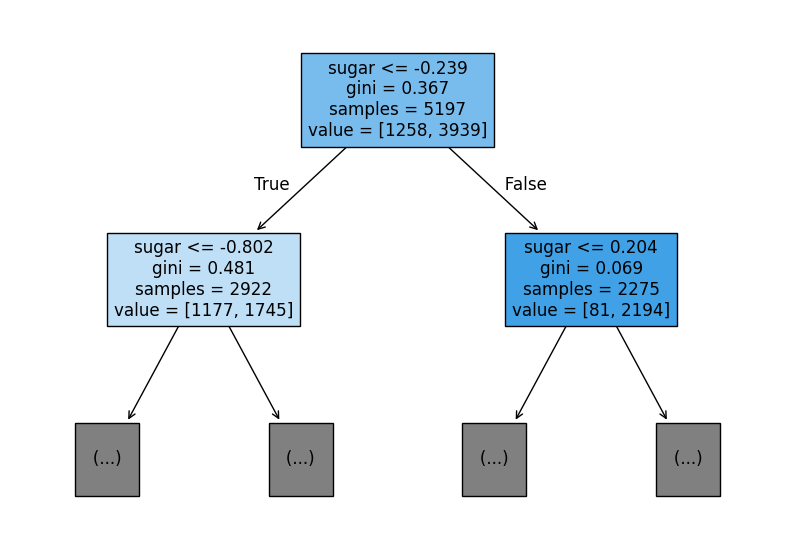

In [155]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth= 1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

* 결정 트리 노드의 이해
  - **결정 트리에서 예측하는 방법 : 리프 노드에서 가장 많은 클래스가 예측 클래스**
* 회귀 문제에 대한 결정 트리 : DecisionTreeRegressor
  - 리프 노드에 도달한 샘플의 타깃을 평균하여 예측값으로 사용

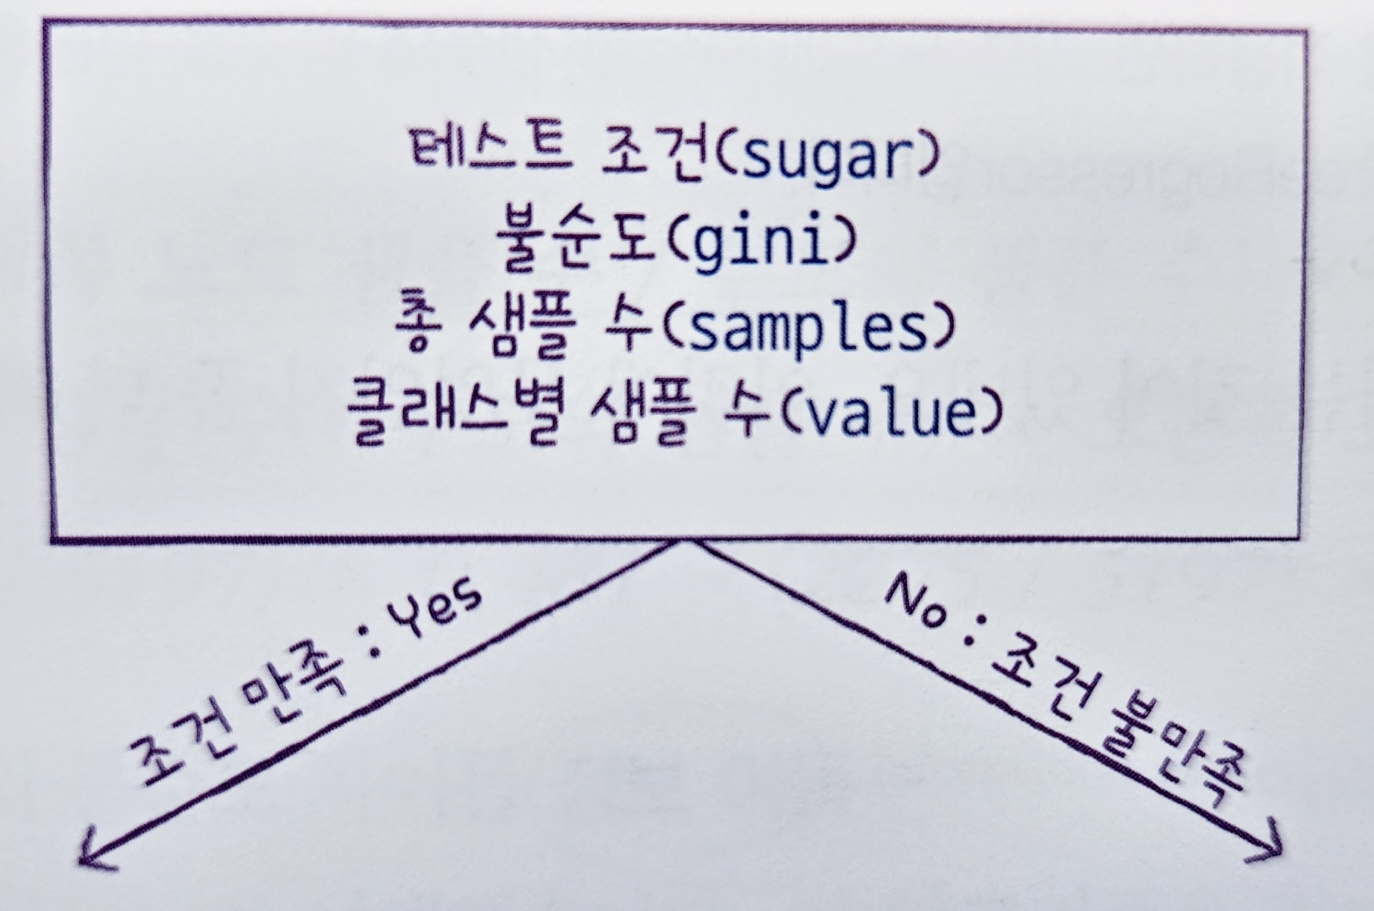

#### [불순도]
* 결정 트리 알고리즘에서 노드의 순수성(purity)을 측정하여 노드에서 데이터를 분할할 기준으로 사용
* DecisionTreeClassifier 클래스는 criterion 매개변수로 불순도 기준을 정함
  - 'gini' (기본값) : 지니 불순도
  - 'entropy' : 엔트로피 불순도
* 임의로 하나의 샘플을 선택했을 때, 그 샘플이 잘못 분류될 확률

##### **지니 불순도(Gini Impurity)**
* 노드에서 데이터가 속해있는 클래스의 혼합 정도를 수치화
* 한 노드 안에 다양한 클래스가 섞여 있을수록 지니 불순도는 높고, 하나의 클래스만 있다면 불순도는 0(완전한 순수)
  - 클래스별 분포가 똑같다면 가장 불순한 상태
  - 클래스 분포 : [50%, 50%] ==> *G* = 1 - (0.5<sup>2</sup> + 0.5<sup>2</sup>) = 0.5
* 결정 트리는 **지니 불순도가 낮아지는 방향으로 분할됨**
* 클래스가 *K*개일 때, 지니 불순도 수식
  - *p<sub>k</sub>* : 클래스 *k*에 속할 확률 (즉, 해당 노드 내에서 클래스 *k*의 비율)

$$
G = 1 - \sum_{k=1}^{K} p_k^2
$$


##### **엔트로피 불순도(Entropy Impurity)**
* 노드의 무질서를 수치화하며, 값이 클수록 노드가 더 혼합되어 있음을 의미
* 결정 트리는 **엔트로피가 가장 많이 감소하는 쪽으로 분할됨**
* 지니와 엔트로피는 유사한 결과를 내지만, 엔트로피는 약간 더 "이론적" 접근이고 로그 연산으로 계산 비용이 조금 더 큼
* 클래스가 *K*개일 때, 엔트로피 불순도 수식
  - *p<sub>k</sub>* : 클래스 *k*에 속할 확률

$$
H = -\sum_{k=1}^{K} p_k \log_2(p_k)
$$


* 교재 예제에서 지니 불순도 계산

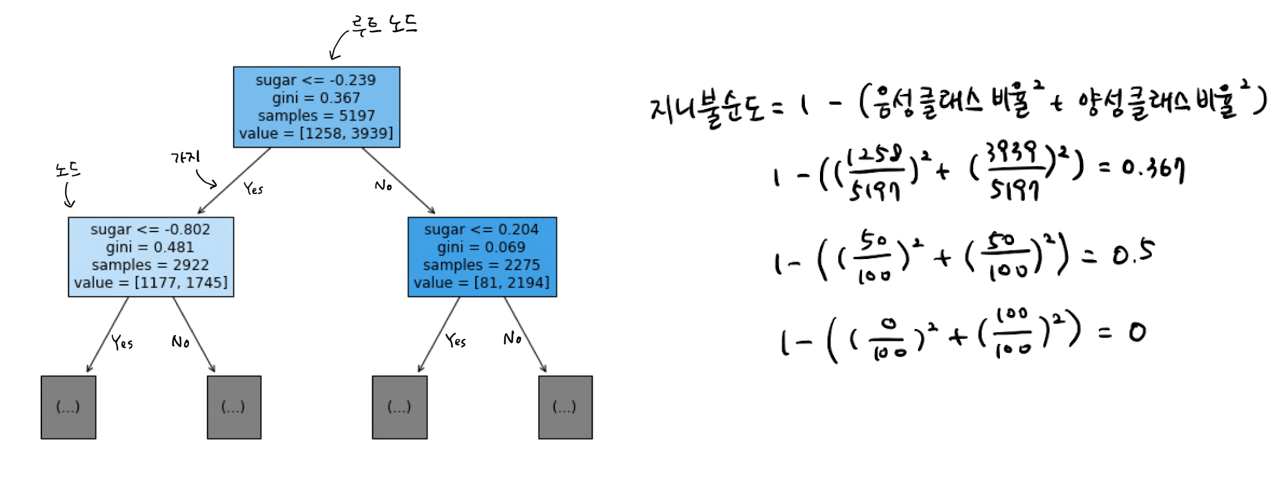

* **정보 이득(Information Gain)**
  - 부모와 자식 노드 사이의 불순도 차이
  - 결정 트리는 **정보 이득이 최대가 되도록 데이터를 분할**

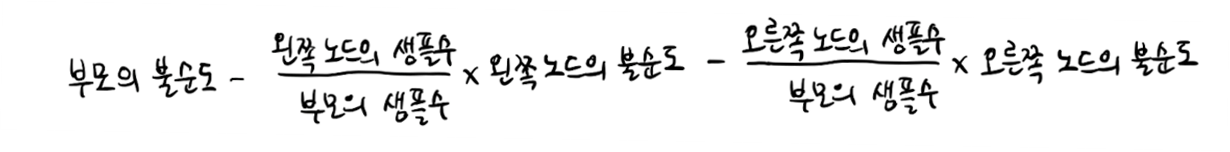

#### [가지치기]
* 가지치기를 하지 않으면 훈련 세트에는 아주 잘 맞지만 테스트 세트의 점수가 낮아짐 ==> 과대 적합
* 사이킷런의 결정 트리 알고리즘은 여러 가지 가지치기 매개변수 제공
  - 예) max_depth : 결정 트리의 최대 깊이를 지정하여 가지치기

In [160]:
# max_depth =3으로 최대 3개 노드까지만 성장하도록 제함
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

* 모델 정확도 평가 

In [162]:
print(dt.score(train_scaled, train_target))

0.8454877814123533


In [163]:
print(dt.score(test_scaled, test_target))

0.8415384615384616


* 결정 트리 시각화

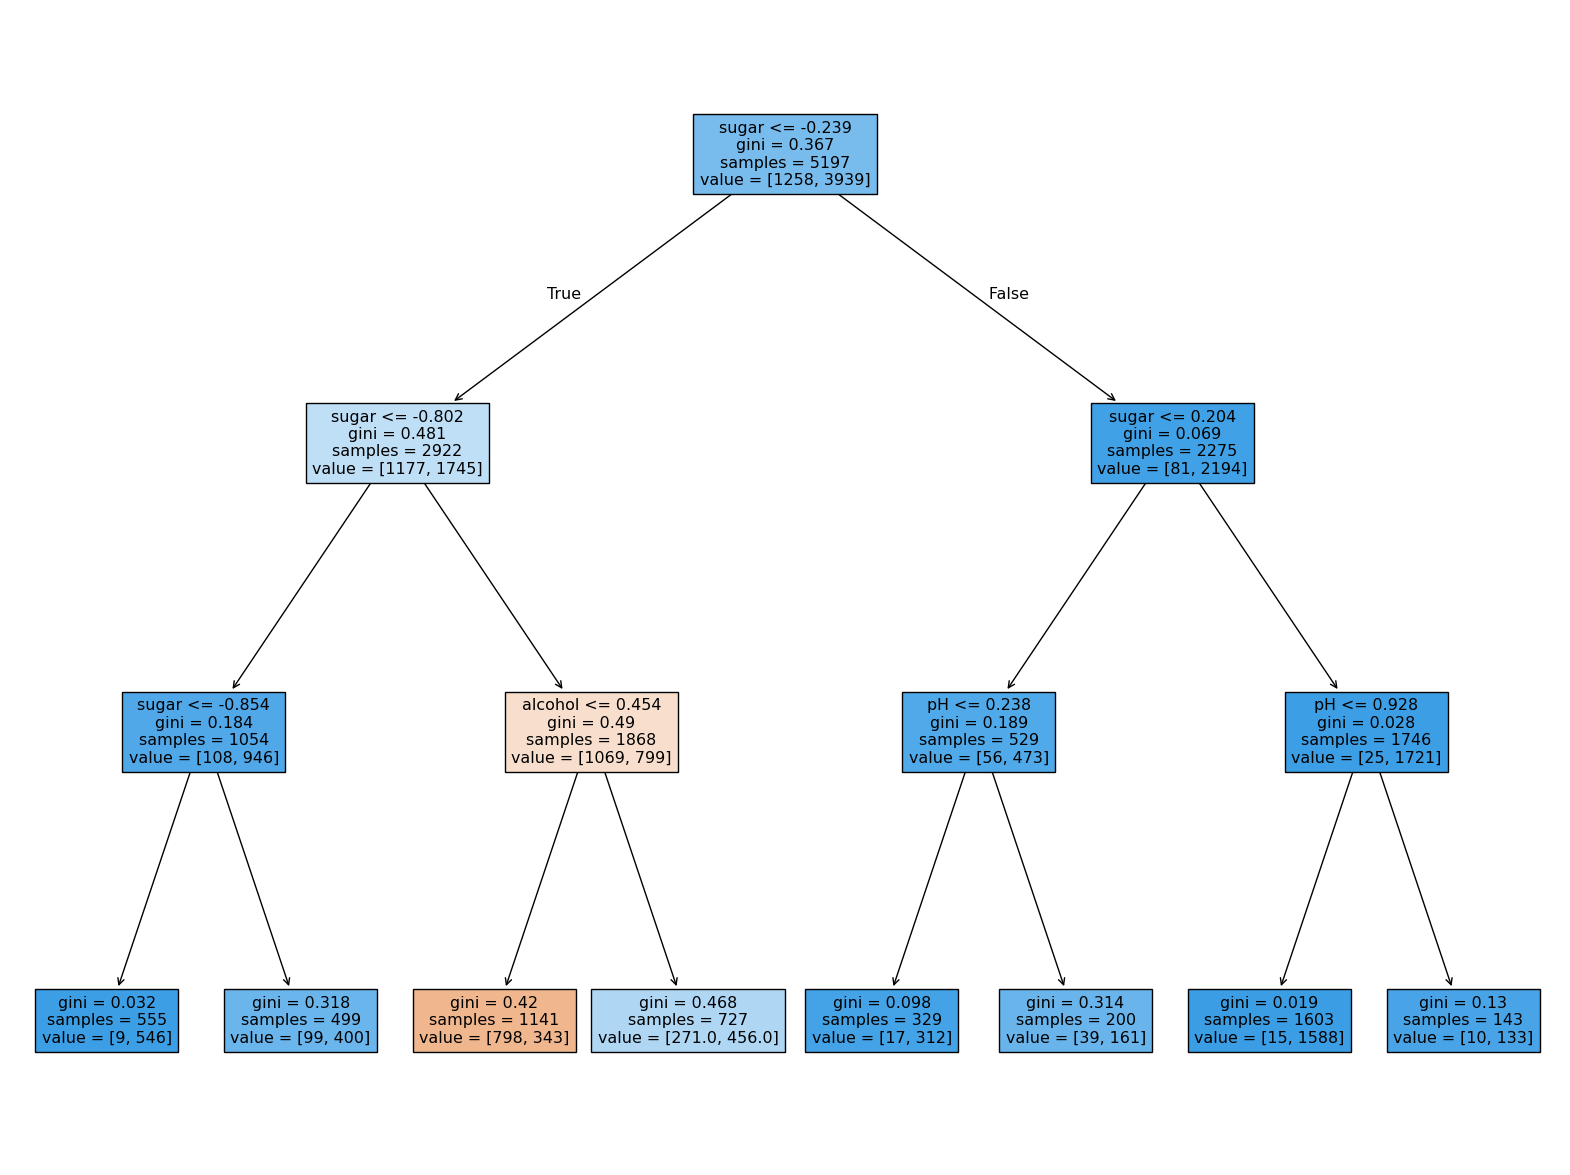

In [165]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

#### [스케일 조정하지 않은 특성 사용하기]
* 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않음
* 표준화 전처리를 할 필요가 없음

In [167]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
# 표준화하지 않은 원본 훈련 세트를 입력으로 훈련 실시
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

* 모델 정확도 평가

In [169]:
dt.score(train_input, train_target)

0.8454877814123533

In [170]:
dt.score(test_input, test_target)

0.8415384615384616

* 결정 트리 시각화

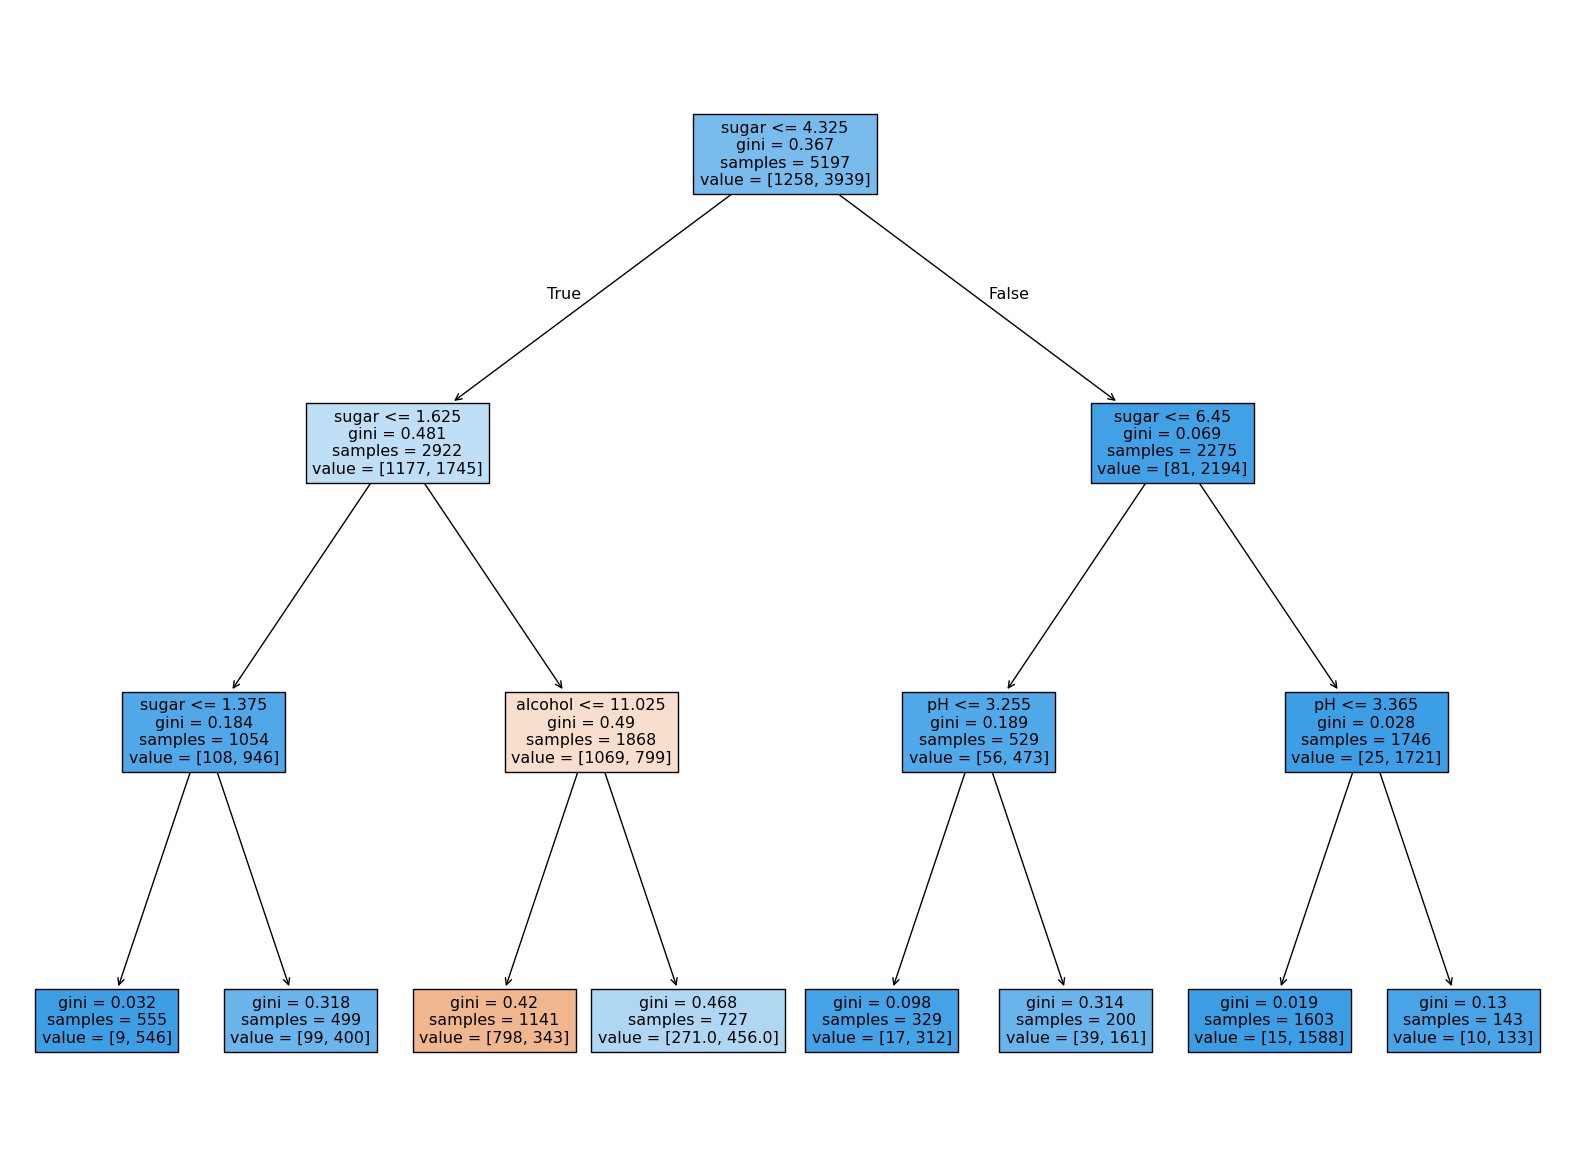

In [172]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

* **특성 중요도** : 결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값
  - 특성의 중요도를 모두 더하면 1이 됨
  - 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산
  - 결정 트리 모델을 특성 선택에 활용할 수 있음

In [174]:
dt.feature_importances_

# 알코올 도수 : 0.1234526
# 당도 : 0.86862934
# pH : 0.0079144

array([0.12345626, 0.86862934, 0.0079144 ])

* min_impurity_decrese 매개변수를 이용해 가지치기
  - 정보 이득 x (노드의 샘플 수) / (전체 샘플 수) 가 min_impurity_decrease보다 작으면 분할 중지

In [176]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)

In [179]:
dt.score(train_input, train_target)

0.8874350586877044

In [181]:
dt.score(test_input, test_target)

0.8615384615384616

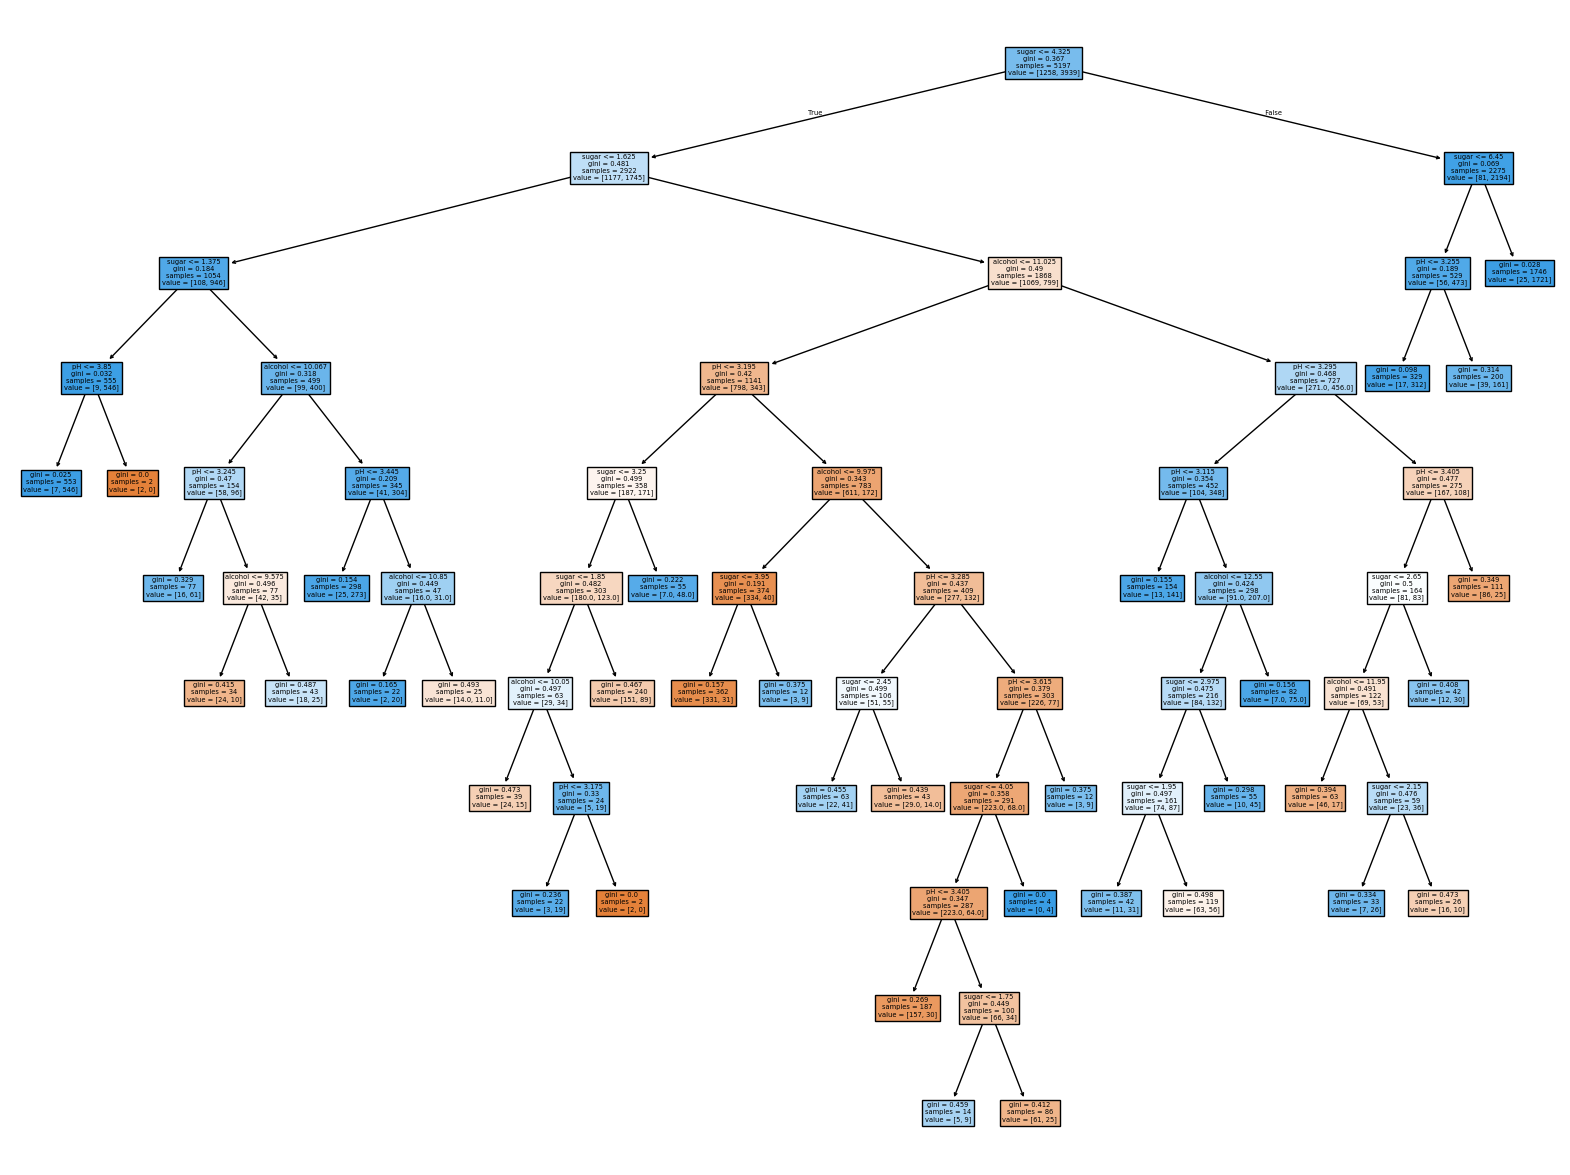

In [183]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()